<a href="https://colab.research.google.com/github/Pankajcsakhare/DS_PY_Writeups_2102633/blob/main/exp04_notebook_2102633_Ploting2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No : 04

##**Aim :** 
Learn use of maplotlib library as visualisation tool in data science pipeline to create contour plots, histograms and box plots.

## Performance : 

[Students need to execute each and every cell in this section and note the output of the same. Once done they have to answer Questions mentioned in review section]


### Density and Contour plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.

There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

We will see examples of this type of plot in section below

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import numpy as np

In [ ]:
# A 3D function to plot 

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.

The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.

Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [ ]:
# x is set of 50 values between 0 and 5 
# x is set of 40 values between 0 and 5

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

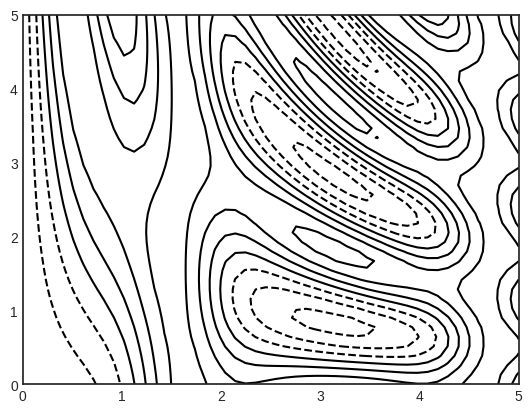

In [ ]:
plt.contour(X, Y, Z, colors='black');

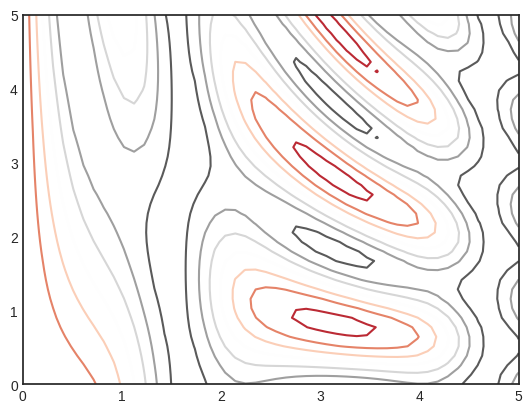

In [ ]:
plt.contour(X, Y, Z, cmap='RdGy');

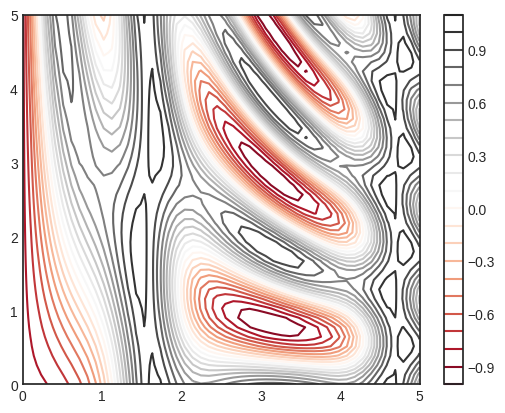

In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

##Answer Following Questions : 
#1.   Explain what are the changes you observe in contour plots above 3 code cells ?

#Ans:
1. plt.contour(X, Y, Z, colors='black');

It creates contour plot with default number of levels, but with black lines instead of filled contours.

When we use the colors='black' argument, the contours will be drawn as black lines instead of filled color regions, and the number of contour levels will be chosen automatically by matplotlib. This can be useful if we want to add contour lines to an existing plot or if we want to emphasize the shape of the contours without the distraction of filled regions.

Compared to a standard filled contour plot, the black lines of the contour plot created with colors='black' may be easier to see on a black and white printout, and they may be more suitable for specific applications where color is not an option or is not desirable.

In summary, using colors='black' argument in plt.contour(X, Y, Z, colors='black') creates a contour plot with black contour lines instead of filled color regions, and with automatically chosen number of contour levels.


2. plt.contour(X, Y, Z, cmap='RdGy');

It call, the cmap parameter sets the colormap used to color the contour levels to 'RdGy' (Red-Gray).

If we compare this with the previous code block that did not specify the number of levels, the main difference is that the number of contour levels is not explicitly set to a specific value. This means that matplotlib will automatically choose a number of levels to use based on the data range and the size of the plot.

Therefore, the specific changes observed in the contour plot may depend on the specific data used to create it, as well as on the default number of levels used by matplotlib. However, in general, using a different colormap can result in a different visual representation of the same data. The 'RdGy' colormap is a diverging colormap that ranges from red to white to gray, with a range of gray shades for values near zero. This colormap can be useful for highlighting positive and negative values in the data.

3. plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

It creates a contour plot of the function defined by the X, Y, and Z arrays, with 20 contour levels and using the 'RdGy' colormap. The plt.colorbar() call adds a color bar to the plot to show the mapping between the contour levels and colors in the colormap.

The main changes observed in the contour plot are:

Number of contour levels: By setting the number of levels to 20, the contour plot will show more contour lines than if it were set to a smaller number.

Color scheme: The 'RdGy' colormap uses a range of red and gray colors to represent the contour levels, with red representing higher values and gray representing lower values. This creates a distinctive visual pattern in the contour plot.

Color bar: The plt.colorbar() call adds a color bar to the plot that shows the mapping between the contour levels and colors in the colormap. The color bar typically includes a range of colors that correspond to the contour levels, and a scale that shows the relationship between the colors and the function values they represent. The color bar can help to interpret the contour plot and understand the range of values in the function.





#2.   What is size of X, Y and Z  respectively ?

#Ans: 
1. The size of X, Y, and Z would be determined by the data used to create the contour plot.
2. The plt.colorbar() function call adds a color bar to the contour plot. The size of the color bar is determined by the size of the plot and the specific settings used to create the color bar. 
3. The colorbar() function typically creates a new axis for the color bar, so the size of the color bar is independent of the size of X, Y, and Z.


#3.   How does colorbar() method help in contour plot.

#Ans.

1. In a contour plot, the colorbar() method is used to add a color bar to the plot. The color bar provides a visual representation of the range of values in the contour plot and the corresponding colors used to represent those values.

2. The colorbar() method is typically used after the contour() method is called. 

### Creating Smoother Contour Plots
One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.

This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows how to perform this:

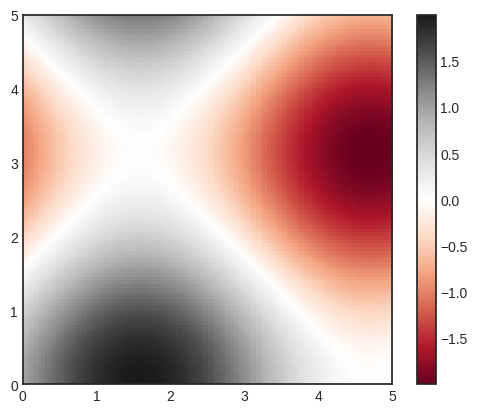

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

# Create the plot with imshow and a colorbar
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()

# Set the aspect ratio of the plot
plt.gca().set_aspect('equal')

# Display the plot
plt.show()


Things to remember while using ``imshow()``:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

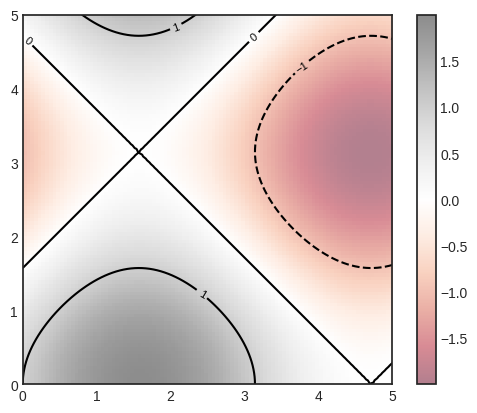

In [ ]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

Answer Following Questions : 
#1.   What does alpha parameter do ?

#Ans. 
i) The alpha parameter in Matplotlib controls the transparency of a plot element, where a value of 1.0 means fully opaque and 0.0 means fully transparent.

ii) When plotting multiple elements on top of each other, setting the alpha value less than 1.0 allows the underlying elements to show through, creating a blending effect. This can be useful for visualizing overlapping data points, or for highlighting certain areas of a plot while still allowing other elements to be visible.

  

#2.   What does clabel method does ?

#Ans.
The clabel() method in Matplotlib is used to add labels to contour plots. It takes a set of contour lines (as returned by plt.contour() or plt.contourf()) and adds labels to them at the specified levels.




#3.   Recreate above code block after, changing parameter 4 in contour fuction to 5 from 3. Explain what change you see in the plot.

#Ans. 





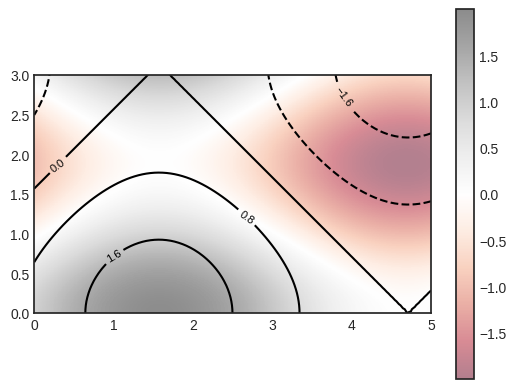

In [ ]:
contours = plt.contour(X, Y, Z, 4, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 3], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

### Histogram, Binning Plots

A histogram is a graphical representation of a grouped frequency distribution with continuous classes. It is an area diagram and can be defined as a set of rectangles with bases along with the intervals between class boundaries and with areas proportional to frequencies in the corresponding classes. In such representations, all the rectangles are adjacent since the base covers the intervals between class boundaries. The heights of rectangles are proportional to corresponding frequencies of similar classes and for different classes, the heights will be proportional to corresponding frequency densities.

In other words, a histogram is a diagram involving rectangles whose area is proportional to the frequency of a variable and width is equal to the class interval.

The histogram graph is used under certain conditions. They are:



*   The data should be numerical.
*   A histogram is used to check the shape of the data distribution. 
*   Used to check whether the process changes from one period to another.
*   Used to determine whether the output is different when it involves two or more processes.
*   Used to analyse whether the given process meets the customer requirements.



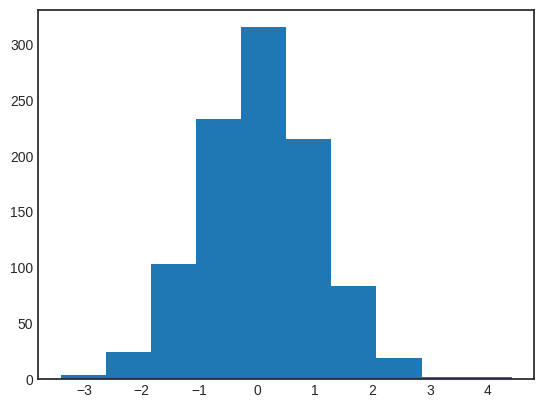

In [ ]:
# How to plot histogram
data = np.random.randn(1000)
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

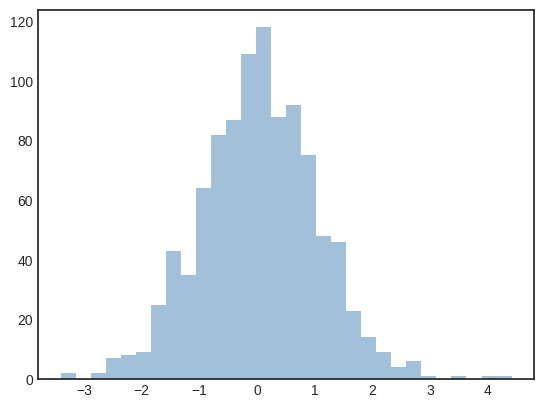

In [ ]:
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

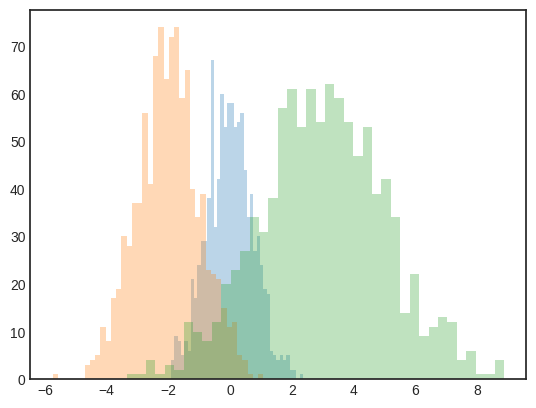

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [ ]:
#Only storing histogram bin frequencies without ploting it
counts, bin_edges = np.histogram(data, bins=5)
print(counts,bin_edges)

[ 28 336 530 102   4] [-3.40558067 -1.84215893 -0.27873719  1.28468455  2.84810628  4.41152802]


### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [ ]:
# Create 2 Variable normally distributed data sets with 10000 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

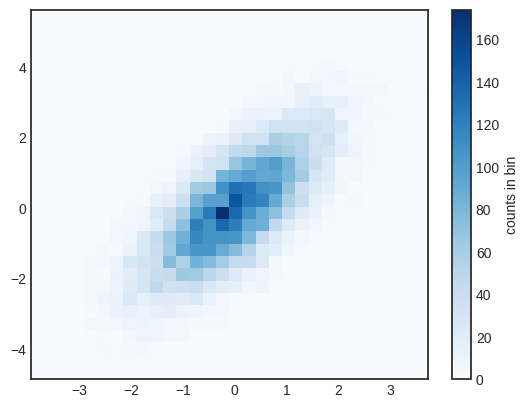

In [ ]:
#Using 2d Histogram plot
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

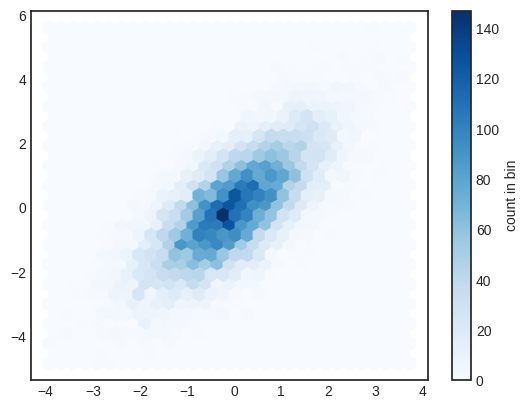

In [ ]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Questions:

##1.  What is role of bins parameter in histogram plot?

#Ans.

i. The bins parameter in a histogram plot specifies the number of bins or bars into which the range of values in the data will be divided. In other words, the bins parameter controls the granularity of the histogram.

ii. A histogram is a graphical representation of the distribution of a set of continuous data. It consists of a series of rectangles, called bins, whose widths represent intervals of values and whose heights represent the frequency of occurrences of the values within each interval.

iii. By default, Matplotlib uses a default value of bins=10 when plotting a histogram. However, depending on the range of values and the nature of the data, the default value of bins may not be appropriate. Therefore, it is important to choose a suitable value for bins that best represents the distribution of the data.

iv. If the bins value is too low, the histogram may be too broad and not reveal the underlying pattern of the data. If the bins value is too high, the histogram may be too detailed and reveal small fluctuations that are not meaningful.

v. In general, choosing an appropriate value for bins involves some trial and error and may depend on the nature of the data and the purpose of the analysis. A rule of thumb is to aim for 10-15 bins for a small dataset and 30-50 bins for a large dataset, but this is not a hard and fast rule.




 

#2.  Create a set of 10000 uniform random samples and store it in variable named *norm_data*. Draw histograms of *norm_data* with following bin counts 5, 50, 500, 5000.

#Ans.

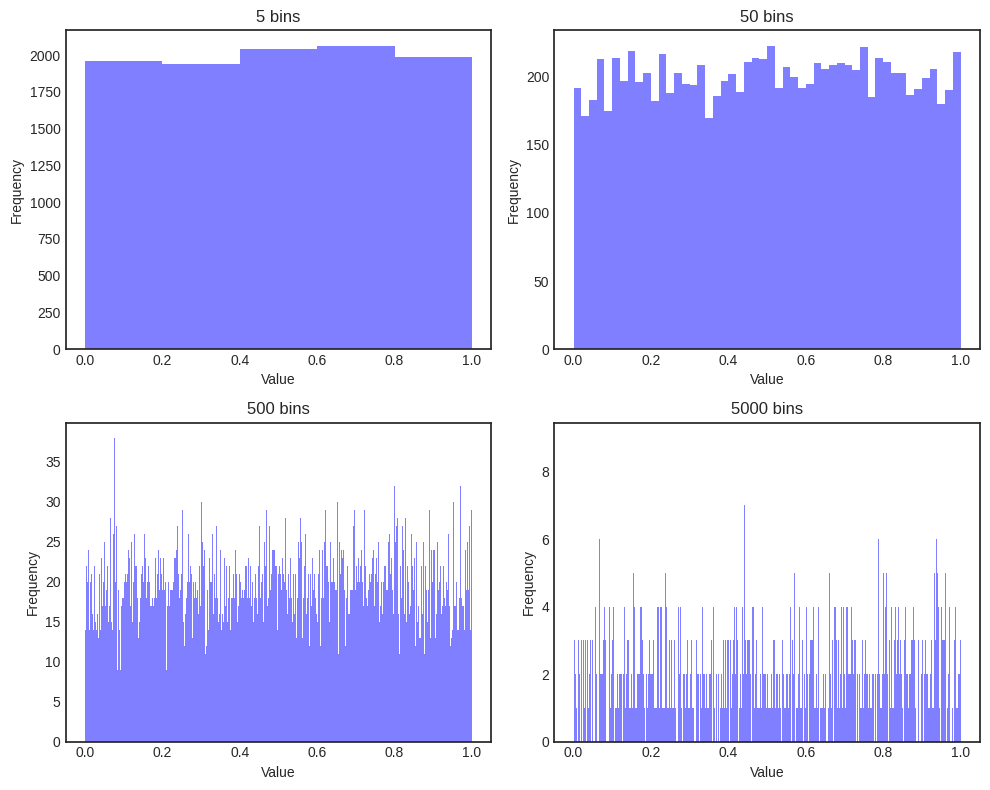

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate 10000 uniform random samples
norm_data = np.random.uniform(size=10000)

# set up bin counts
bin_counts = [5, 50, 500, 5000]

# draw histograms with different bin counts
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, bins in enumerate(bin_counts):
    ax = axs[i]
    ax.hist(norm_data, bins=bins, alpha=0.5, color='blue')
    ax.set_title(f'{bins} bins')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This code generates 10000 uniform random samples using the np.random.uniform() function and stores them in the variable norm_data. It then defines a list of bin counts (bin_counts) and loops over them, drawing histograms with the specified bin counts using the plt.hist() function. The resulting histograms are plotted in a 2x2 grid using subplots() and displayed using plt.show().

#3. Explain your observations in text box of above step.

### Ploting from a CSV File

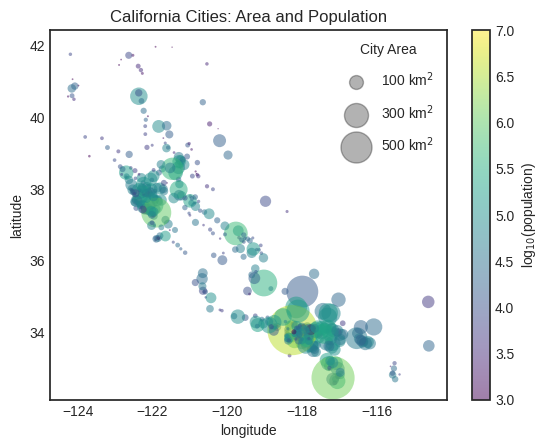

In [ ]:
# Path to file /content/sample_data/california_cities.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
cities = pd.read_csv('/content/sample_data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)


plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population')

plt.show()


### Multiple Subplots
Sometimes it is helpful to compare different views of data side by side. Matplotlib has the concept of *subplots* : groups of smaller axes that can exist together within a single figure.

These subplots might be insets, grids of plots, or other more complicated layouts. 

In [ ]:
plt.style.use('seaborn-white')
import numpy as np

<ipython-input-22-fc4ce995d0e1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### ``plt.axes``: Subplots by Hand (Coding)

The most basic method of creating an axes is to use the ``plt.axes`` function. By default this creates a standard axes object that fills the entire figure.

``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent 
``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

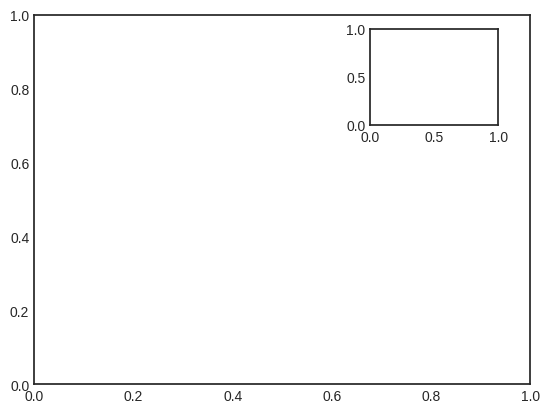

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.650, 0.650, 0.2, 0.2]) #inset axes

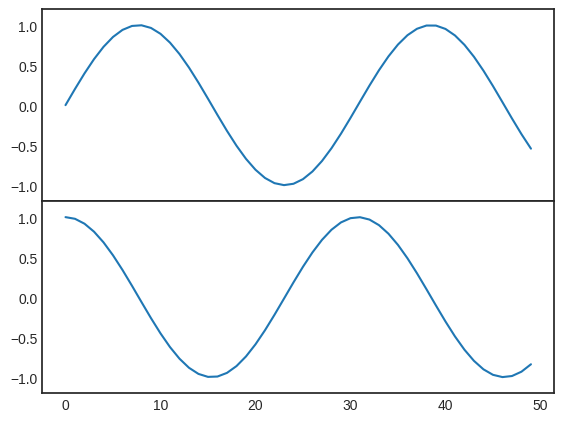

In [ ]:
#creating subplot using fig.add_axes
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.

The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.

As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

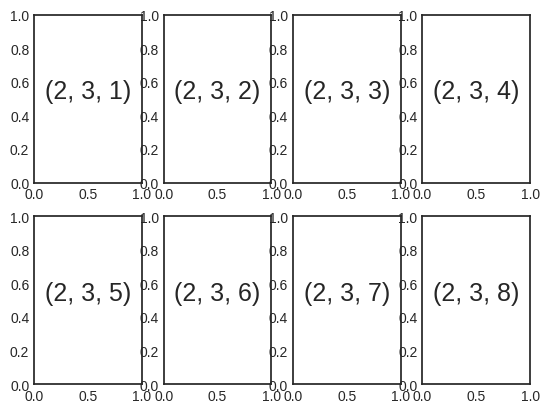

In [ ]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')


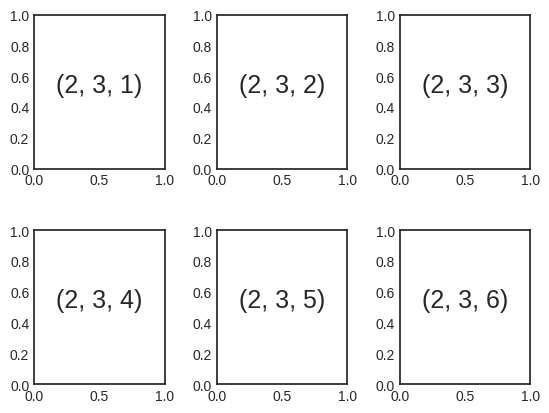

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

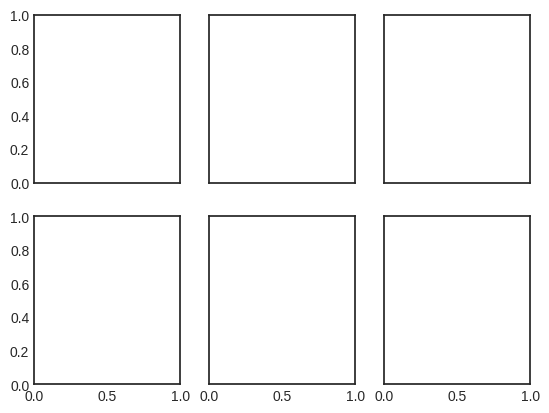

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.


The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

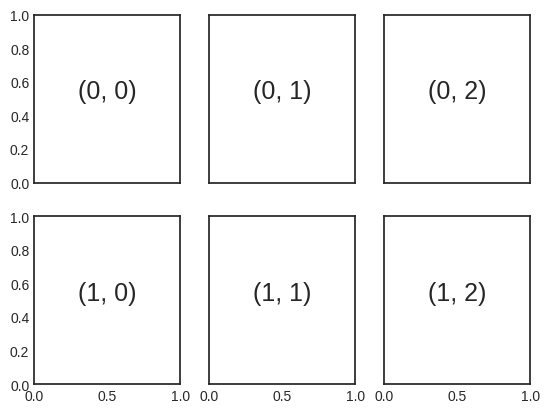

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

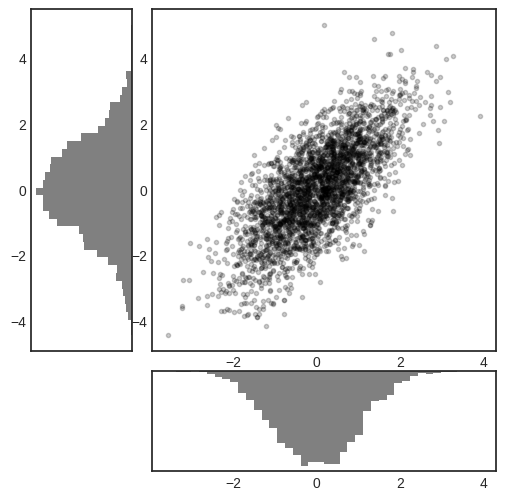

In [ ]:
# An example of Flexible grid arrangement
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

births = pd.read_csv('/content/sample_data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]


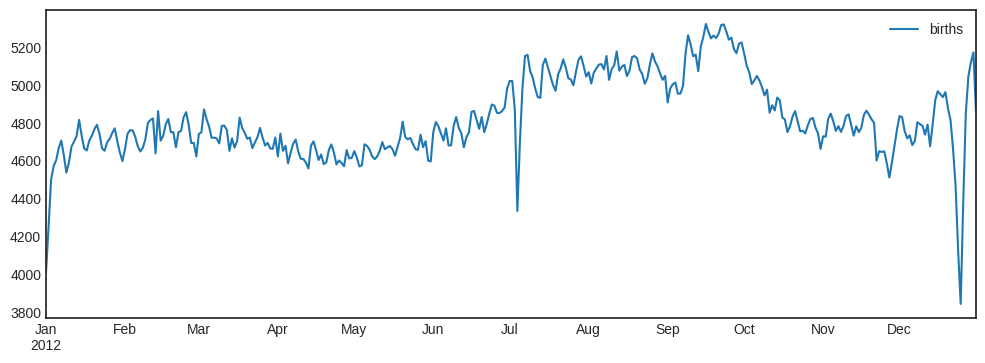

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# assume you have already loaded or created the `births_by_date` DataFrame
fig, ax = plt.subplots(figsize=(12, 4))
date_range = pd.date_range('2012-01-01', '2012-12-31')
births_by_date.index = date_range
births_by_date.plot(ax=ax)
plt.show()


### Boxplot

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. 

In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.



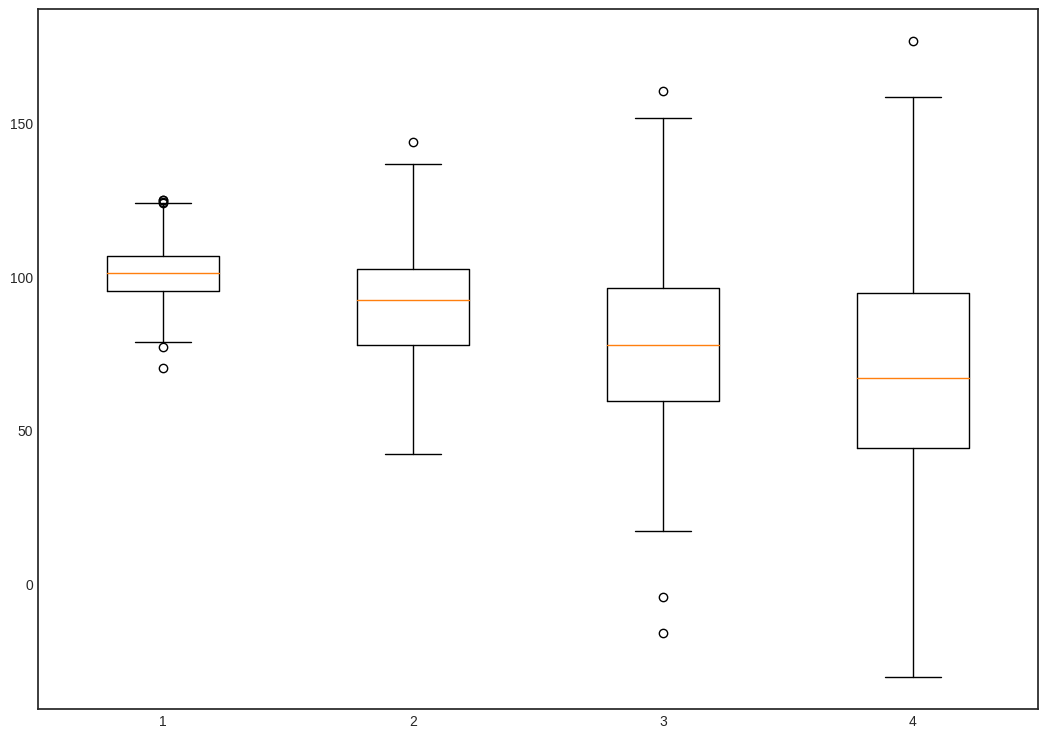

In [ ]:
#Exmple of Box plot for some random data sets
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


#Questions:

#1. What is boxplot ?

#Ans. 

1. A box plot is a graphical representation of a five-number summary that shows the distribution of a dataset. It is used to visualize the spread and skewness of data, and to identify potential outliers. 
2. The five-number summary consists of the minimum and maximum values, the first and third quartiles, and the median (the middle value when the data is ordered). 
3. The box in the box plot represents the interquartile range (IQR), which is the distance between the first and third quartiles. The whiskers extend from the box to the smallest and largest observations within 1.5 times the IQR. 
4. Data points that fall outside the whiskers are considered outliers and are plotted as individual points. Box plots can be used to compare the distributions of different datasets or to compare the same dataset under different conditions.





#2. What information do we get from a box plot?

#Ans. A box plot provides a visual summary of several statistical measures for a dataset, including:

1. Median: The line inside the box is the median of the data, which represents the middle value of the distribution.

2. Quartiles: The box is drawn from the first quartile (Q1) to the third quartile (Q3), which represents the range of the middle 50% of the data.

3. Interquartile range (IQR): The distance between the first and third quartile, which represents the range of the middle 50% of the data.

4. Whiskers: The lines extending from the box represent the minimum and maximum values within 1.5 times the IQR of the lower or upper quartile.

5. Outliers: Points beyond the whiskers represent the outliers, which are data points that are more than 1.5 times the IQR away from the lower or upper quartile.




#3. How is minimum and maximum whisker's marked in a box plot ?

#Ans. 
1. In a box plot, the minimum and maximum whiskers are marked by the smallest and largest data points that fall within 1.5 times the interquartile range (IQR) from the first (Q1) and third (Q3) quartiles, respectively. 
2. Any data points beyond the whiskers are considered outliers and are plotted as individual points.



#4. How to we identify that some points in data are outliers by viewing the box plot? 

#Ans.
1. In a box plot, outliers are typically identified as points that lie beyond the whiskers. The whiskers typically extend to 1.5 times the interquartile range (IQR) beyond the first and third quartiles. 
2. Any points that lie beyond the whiskers are marked as individual points and considered outliers. These points are plotted as individual dots or circles on the plot.


#5. Read a data file from your drive and for all numeric columns plot boxplot.

Ans.

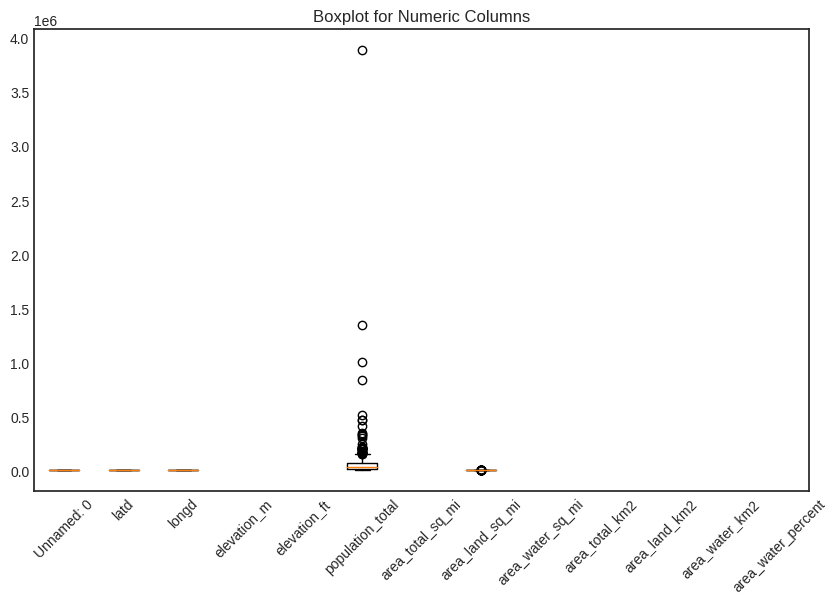

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file
data = pd.read_csv('/content/sample_data/california_cities.csv')

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a boxplot for each numeric column
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data[numeric_cols])
ax.set_xticklabels(numeric_cols, rotation=45)
ax.set_title('Boxplot for Numeric Columns')
plt.show()


## Conclusion
Thus we have learned about basics of  Contour plots, Histograms, Box plots. 